In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd



# Load the dataset


In [76]:
df = pd.read_csv('synthetic_retail_sales.csv')



# Separate numerical and categorical columns


In [77]:
numerical_cols = ['StoreID', 'Sales', 'Customers']
categorical_cols = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']



# Impute missing numerical values with median


In [78]:
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])



# Impute missing categorical values with most frequent


In [79]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])



# Encode categorical features using Label Encoding


In [80]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Normalize numerical features


In [81]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



# Preview the processed dataset


In [82]:
print(df.head())


    StoreID  DayOfWeek     Sales  Customers  Open  Promo  StateHoliday  \
0  0.092905          2 -0.517845   0.017458     1      1             1   
1 -0.015404          5  1.436976  -0.401871     1      1             1   
2 -1.242900          6 -1.481747   0.157235     1      0             1   
3  0.814961          1 -0.024219  -1.244387     1      1             1   
4  0.417830          4  0.418076  -1.335000     1      1             1   

   SchoolHoliday  StoreType  Assortment  
0              1          3           1  
1              1          0           0  
2              1          0           2  
3              1          1           0  
4              1          0           2  


# Exploratory Data Analysis (EDA)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Summary and null check


In [84]:
print(df.info(), '\n', df.describe(), '\nMissing Values:\n', df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreID        3000 non-null   float64
 1   DayOfWeek      3000 non-null   int64  
 2   Sales          3000 non-null   float64
 3   Customers      3000 non-null   float64
 4   Open           3000 non-null   int64  
 5   Promo          3000 non-null   int64  
 6   StateHoliday   3000 non-null   int64  
 7   SchoolHoliday  3000 non-null   int64  
 8   StoreType      3000 non-null   int64  
 9   Assortment     3000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 234.5 KB
None 
             StoreID    DayOfWeek         Sales     Customers         Open  \
count  3.000000e+03  3000.000000  3.000000e+03  3.000000e+03  3000.000000   
mean  -9.681145e-17     2.780333 -1.148711e-16 -1.805963e-16     0.911667   
std    1.000167e+00     1.999687  1.000167e+00  1.000167e+00     0.283826  


# Correlation heatmap


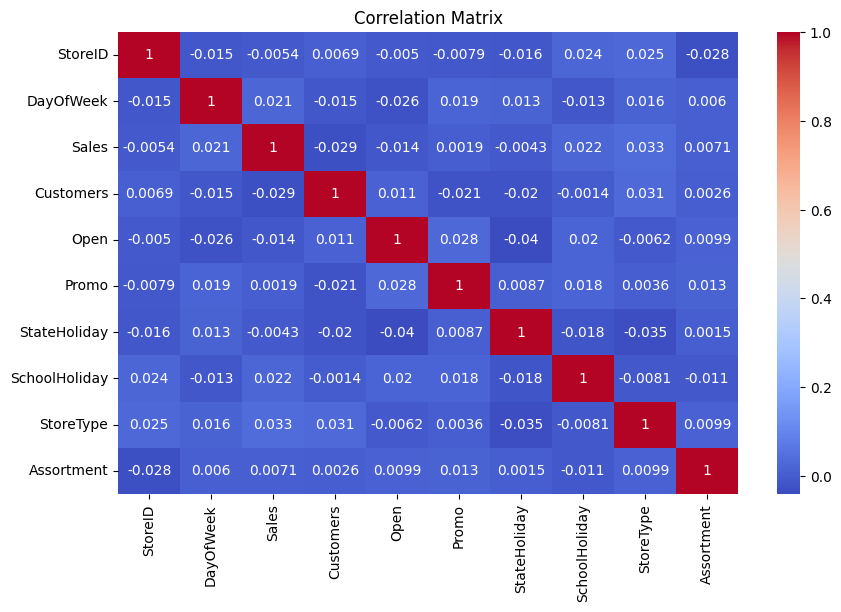

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Distribution of Sales


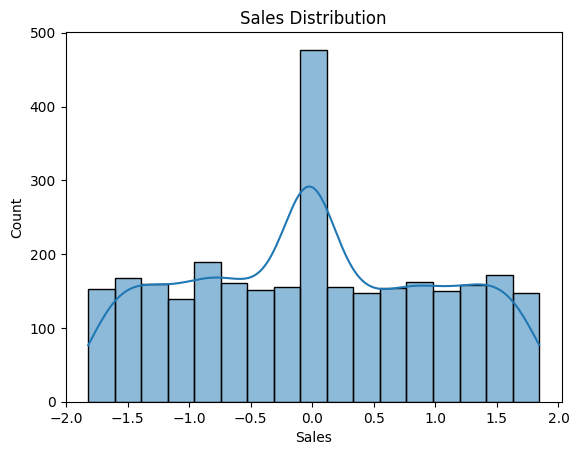

In [86]:
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()



# Boxplot to detect outliers in Sales


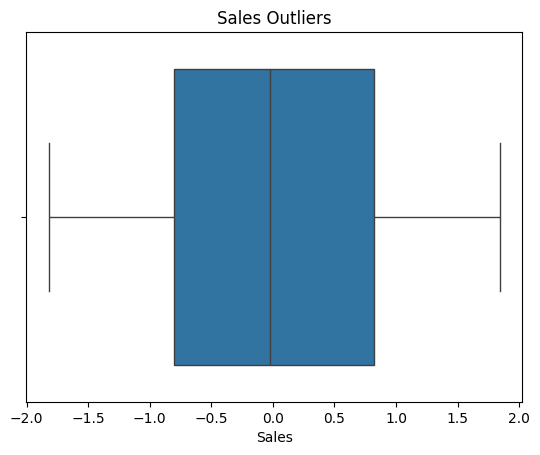

In [87]:
sns.boxplot(x=df['Sales'])
plt.title('Sales Outliers')
plt.show()



# Sales vs Customers


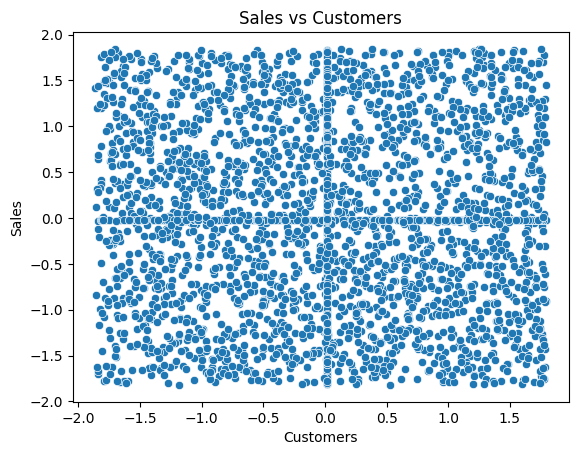

In [88]:
sns.scatterplot(x='Customers', y='Sales', data=df)
plt.title('Sales vs Customers')
plt.show()



# Boxplots of Sales by categorical variables


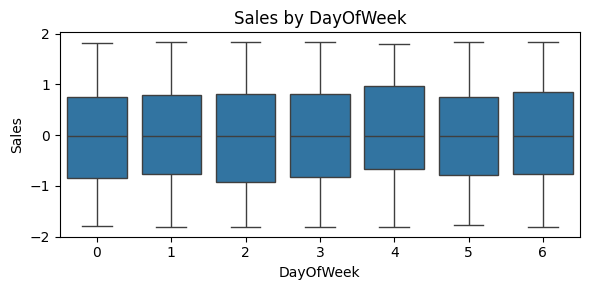

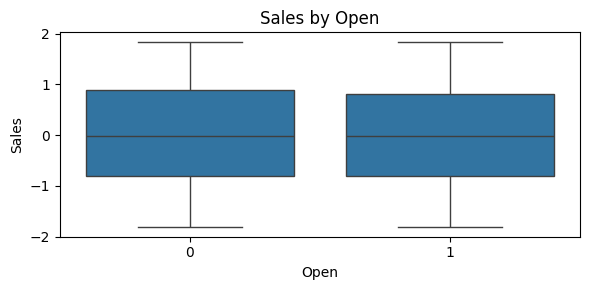

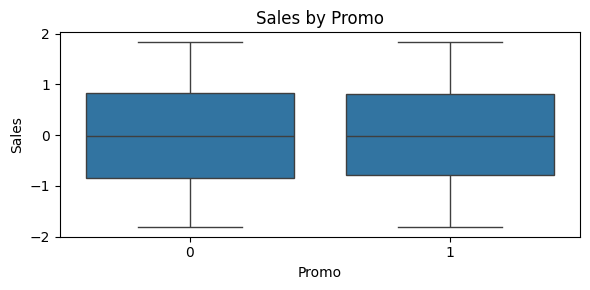

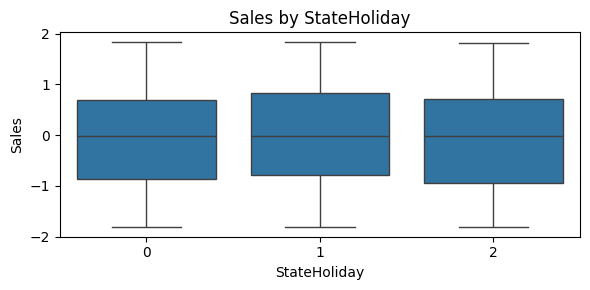

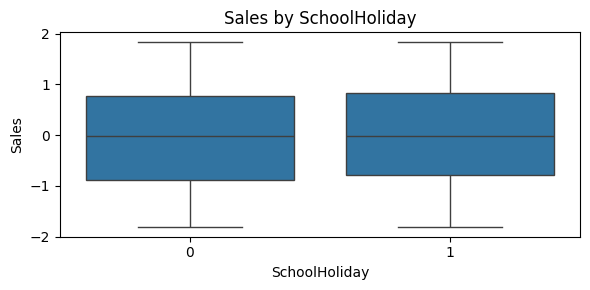

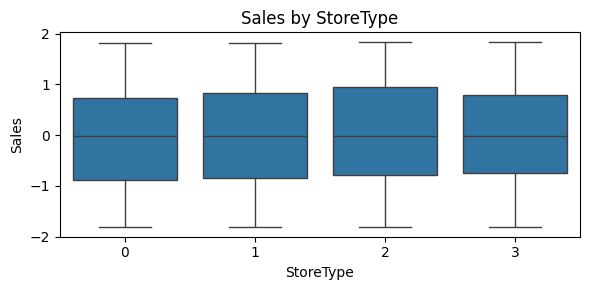

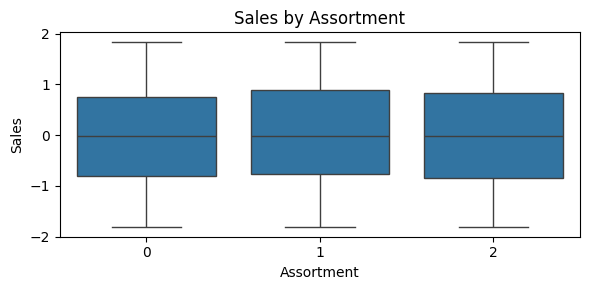

In [89]:
categorical_cols = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=col, y='Sales', data=df)
    plt.title(f'Sales by {col}')
    plt.tight_layout()
    plt.show()


In [90]:
import numpy as np
from sklearn.model_selection import train_test_split



# Split features and target


In [91]:
X = df.drop(columns=['Sales']).values
y = df['Sales'].values.reshape(-1, 1)



# Train-test split


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize weights and biases


In [93]:
np.random.seed(42)
input_dim = X_train.shape[1]
output_dim = 1

W = np.random.randn(input_dim, output_dim) * 0.01
b = np.zeros((1, output_dim))


# Helper Functionss


# Activation Functions


In [94]:
def relu(Z):
    return np.maximum(0, Z)

def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)



# Derivatives


In [95]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

def leaky_relu_derivative(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)



# Loss: Mean Absolute Error


In [96]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))



# Derivative of MAE (sign-based)


In [97]:
def mae_derivative(y_true, y_pred):
    return np.where(y_pred > y_true, 1, -1)


In [98]:
def train_nn(X, y, W, b, activation='relu', epochs=1000, lr=0.01):
    losses = []
    grad_mags = []

    for epoch in range(epochs):
        # Forward propPass
        Z = np.dot(X, W) + b
        if activation == 'relu':
            A = relu(Z)
            dA_dZ = relu_derivative(Z)
        elif activation == 'leaky_relu':
            A = leaky_relu(Z)
            dA_dZ = leaky_relu_derivative(Z)

        # Computingg Loss
        loss = mean_absolute_error(y, A)
        losses.append(loss)

        # Backward prop
        dL_dA = mae_derivative(y, A)
        dZ = dL_dA * dA_dZ
        dW = np.dot(X.T, dZ) / X.shape[0]
        db = np.mean(dZ, axis=0, keepdims=True)

        grad_mags.append(np.linalg.norm(dW))

        # Updatin weights
        W -= lr * dW
        b -= lr * db

        # Print after 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return W, b, losses, grad_mags


# Copy previous W, b init code


In [99]:
W = np.random.randn(input_dim, output_dim) * 0.01
b = np.zeros((1, output_dim))



# Train with ReLU


In [100]:
W_relu, b_relu, losses_relu, grads_relu = train_nn(X_train, y_train, W.copy(), b.copy(), activation='relu')


Epoch 0: Loss = 0.8171
Epoch 100: Loss = 0.8171
Epoch 200: Loss = 0.8171
Epoch 300: Loss = 0.8171
Epoch 400: Loss = 0.8171
Epoch 500: Loss = 0.8171
Epoch 600: Loss = 0.8171
Epoch 700: Loss = 0.8171
Epoch 800: Loss = 0.8171
Epoch 900: Loss = 0.8171



# Train with Leaky ReLU


In [101]:
W_leaky, b_leaky, losses_leaky, grads_leaky = train_nn(X_train, y_train, W.copy(), b.copy(), activation='leaky_relu')


Epoch 0: Loss = 0.8170
Epoch 100: Loss = 0.8170
Epoch 200: Loss = 0.8170
Epoch 300: Loss = 0.8169
Epoch 400: Loss = 0.8169
Epoch 500: Loss = 0.8169
Epoch 600: Loss = 0.8169
Epoch 700: Loss = 0.8169
Epoch 800: Loss = 0.8168
Epoch 900: Loss = 0.8168


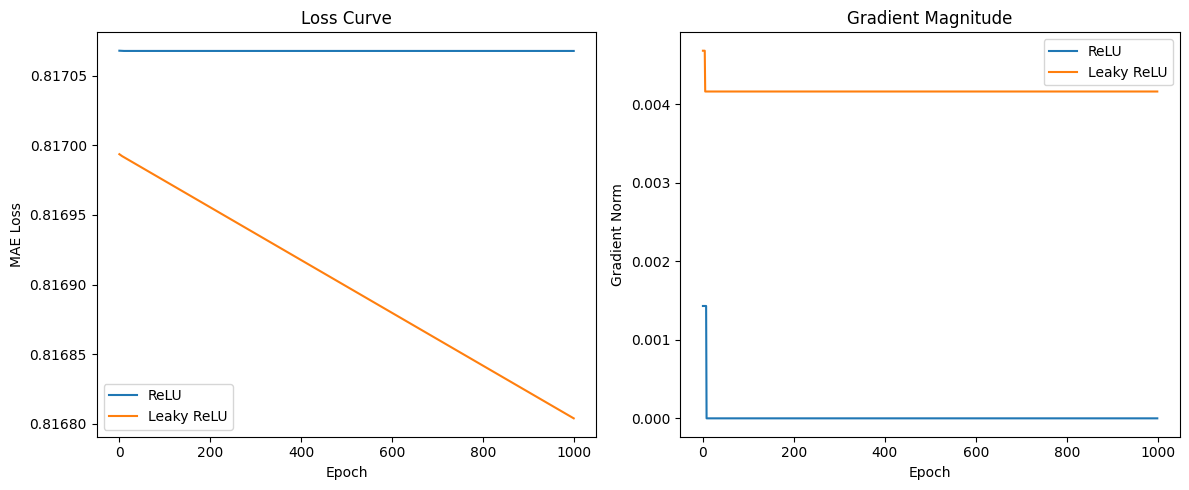

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_relu, label='ReLU')
plt.plot(losses_leaky, label='Leaky ReLU')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(grads_relu, label='ReLU')
plt.plot(grads_leaky, label='Leaky ReLU')
plt.title("Gradient Magnitude")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.legend()

plt.tight_layout()
plt.show()
